In [3]:
from lxh_prediction.plot import plot_curve, plt
from lxh_prediction.curves_auc import auROCExp, auPRExp
from lxh_prediction.curves_cost import FutureCostExp, SensitivityCostExp


[0.69058641 0.72956975 0.71502412 0.68531333 0.70414349]
[0.63549178 0.62179704 0.59823848 0.5942139  0.5798291 ]
ADART: fpr: 0.3015722417999458, tpr: 0.46513849092645654
[0.63463078 0.65181338 0.63279781 0.62268844 0.6280893 ]
NCDRS: fpr: 0.5571970723773381, tpr: 0.7382999044890163
0.3015722417999458
0.3015722417999458 0.09842775820005423 0.05
0.5571970723773381
0.5571970723773381 0.042802927622662024 0.05
0.46513849092645654
0.46513849092645654 0.06513849092645652 0.05
0.7382999044890163
0.7382999044890163 0.061700095510983766 0.05
0.3015722417999458
0.3015722417999458 0.09842775820005423 0.05
0.5571970723773381
0.5571970723773381 0.042802927622662024 0.05
0.46513849092645654
0.46513849092645654 0.06513849092645652 0.05
0.7382999044890163
0.7382999044890163 0.061700095510983766 0.05


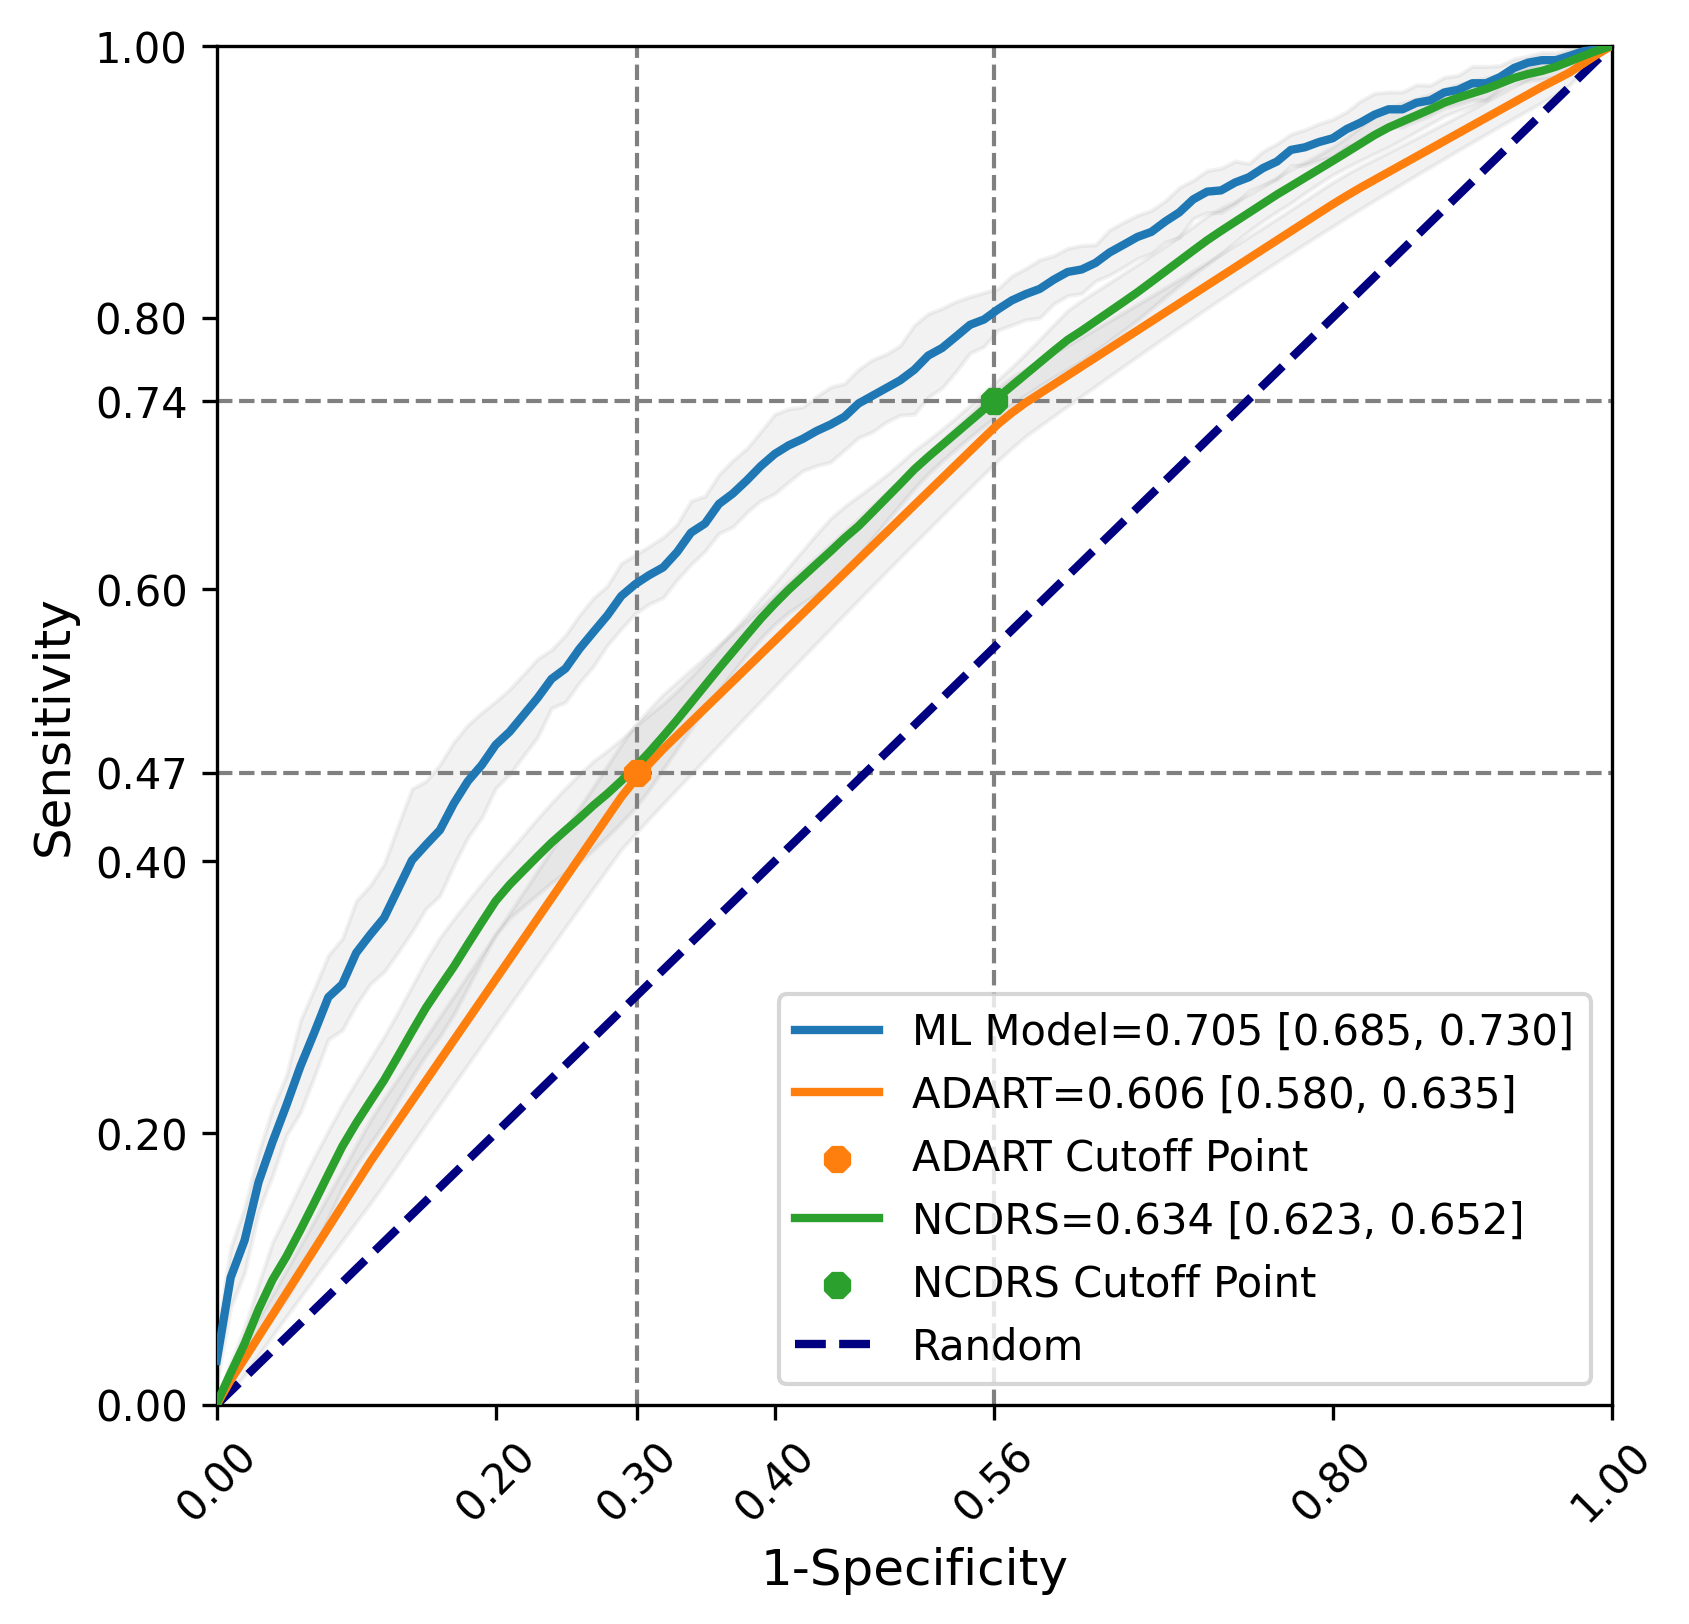

In [4]:
# Figure 4b AUC

exp = auROCExp(plt.figure(figsize=(6, 6), dpi=300), retrain=False)
exp.run("ML Model", "LightGBMModel", "top20_non_lab")
exp.run("ADART", "ADAModel", "ADA", cutoff=True)
exp.run("NCDRS", "CHModel", "CH", cutoff=True)

# Random
plot_curve(
    (0, 1),
    (0, 1),
    ylim=(0, 1),
    xlabel="1-Specificity",
    ylabel="Sensitivity",
    color="navy",
    lw=2,
    linestyle="--",
    name="Random",
)
exp.plot()

exp.save("figure4b_auc")


ADART: precision: 0.17957227138643067, recall: 0.46513849092645654
NCDRS: precision: 0.15827190827190826, recall: 0.7382999044890163
0.46513849092645654
0.46513849092645654 0.06513849092645652 0.05
0.7382999044890163
0.7382999044890163 0.061700095510983766 0.05
0.17957227138643067
0.17957227138643067 0.02042772861356934 0.05
0.15827190827190826
0.15827190827190826 0.04172809172809175 0.05
0.46513849092645654
0.46513849092645654 0.06513849092645652 0.05
0.7382999044890163
0.7382999044890163 0.061700095510983766 0.05
0.17957227138643067
0.17957227138643067 0.02042772861356934 0.05
0.15827190827190826
0.15827190827190826 0.04172809172809175 0.05


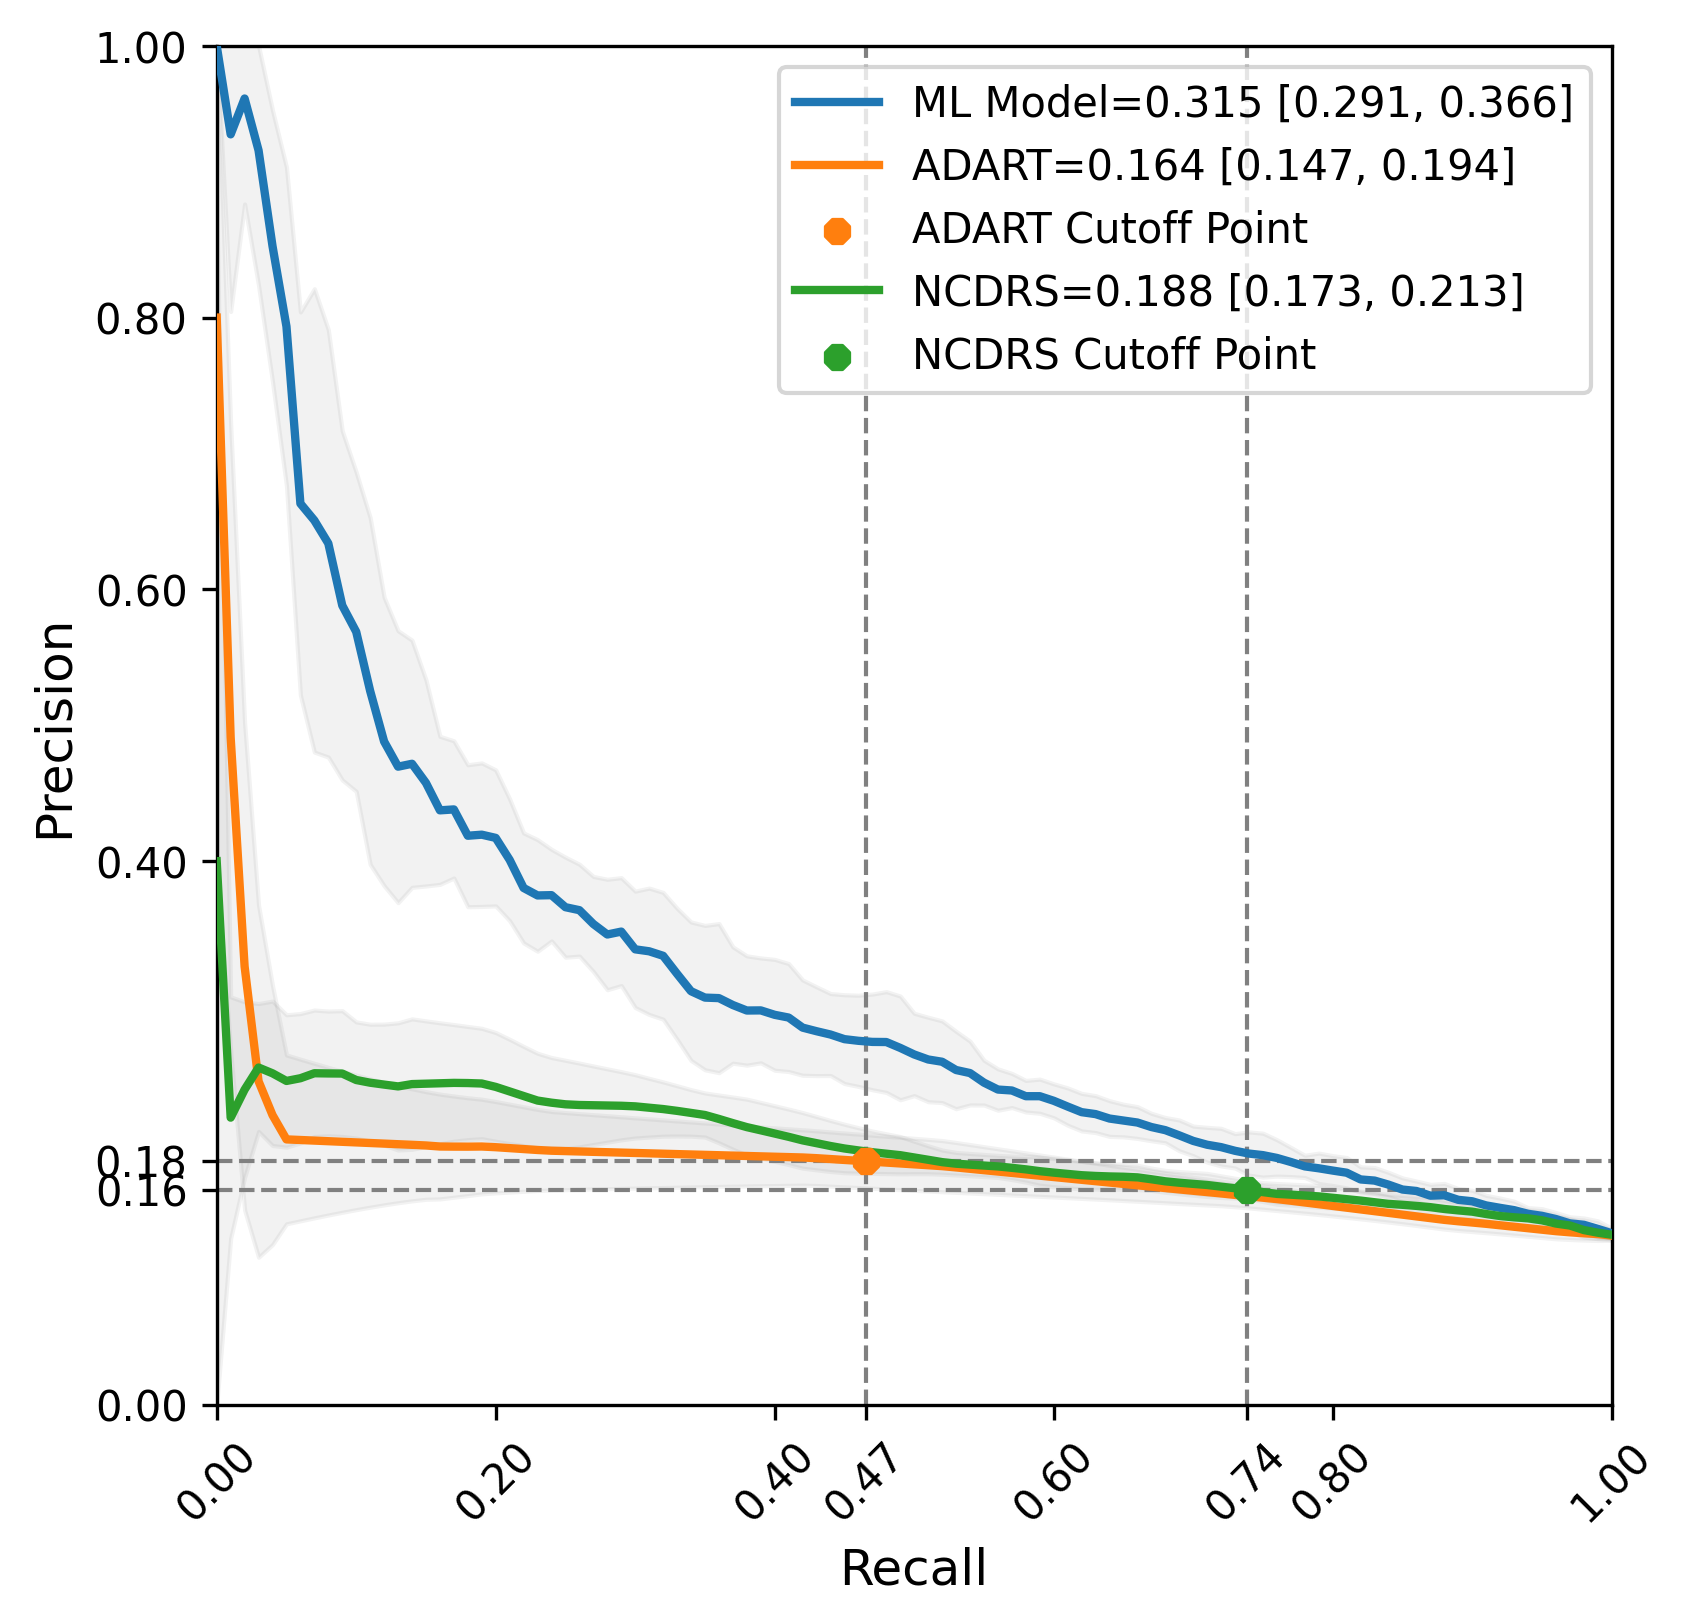

In [5]:
# Figure 4c auPR

exp = auPRExp(plt.figure(figsize=(6, 6), dpi=300), retrain=False)
exp.run("ML Model", "LightGBMModel", "top20_non_lab")
exp.run("ADART", "ADAModel", "ADA", cutoff=True)
exp.run("NCDRS", "CHModel", "CH", cutoff=True)
exp.plot()

plt.legend(loc="upper right")
exp.save("figure4b_auPR")


### Confirmatory test and costs

In [6]:
from lxh_prediction.plot import plot_curve, plt
from lxh_prediction.curves_cost import NeedsMissRateExp, CostMissRateExp


/home/longc/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)
/home/longc/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


NCDRS: miss_rate: 0.7382999044890162, pos_rate: 0.5797032640949555
0.7382999044890162
0.7382999044890162 0.06170009551098388 0.05
0.5797032640949555
0.5797032640949555 0.02029673590504455 0.05
0.7382999044890162
0.7382999044890162 0.06170009551098388 0.05
0.5797032640949555
0.5797032640949555 0.02029673590504455 0.05


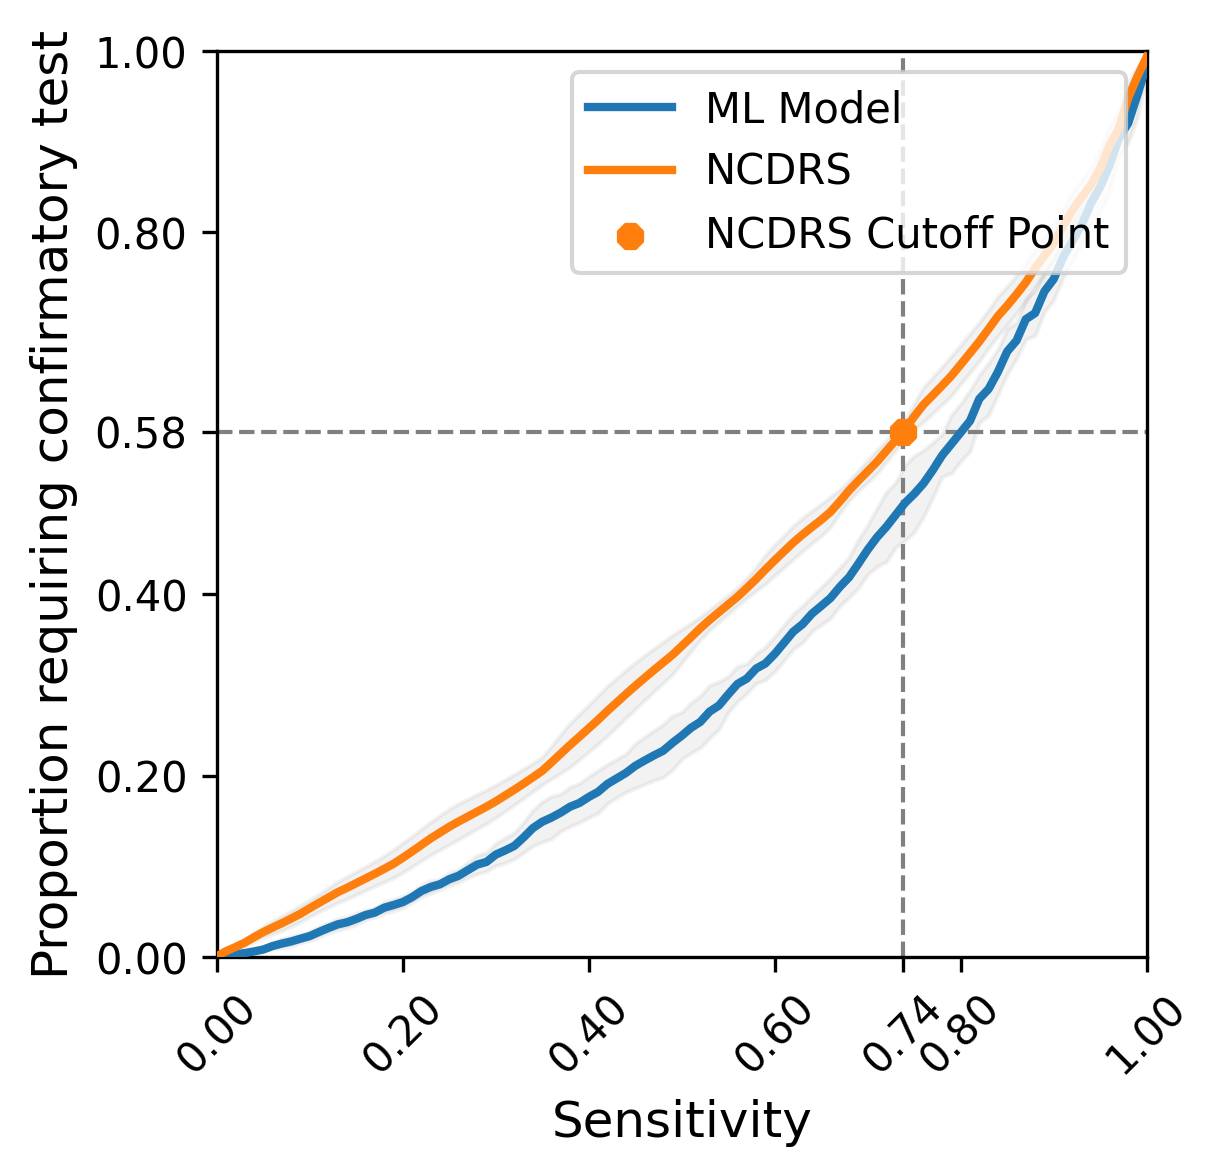

In [7]:
# Figure 4h Confirmatory test

exp = NeedsMissRateExp(retrain=False)

exp.xlim = (0, 1)
exp.run("ML Model", "LightGBMModel", "top20_non_lab")
exp.run("NCDRS", "CHModel", "CH", cutoff=True)

exp.plot()
plt.legend(loc="upper right")
exp.save("figure4h")

/home/longc/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)
/home/longc/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


NCDRS: miss_rate: 0.7382999044890162, costs: 35.33291394658754
0.7382999044890162
0.7382999044890162 0.06170009551098388 0.05
35.33291394658754
35.33291394658754 0.6670860534124614 3.0
0.7382999044890162
0.7382999044890162 0.06170009551098388 0.05
35.33291394658754
35.33291394658754 0.6670860534124614 3.0


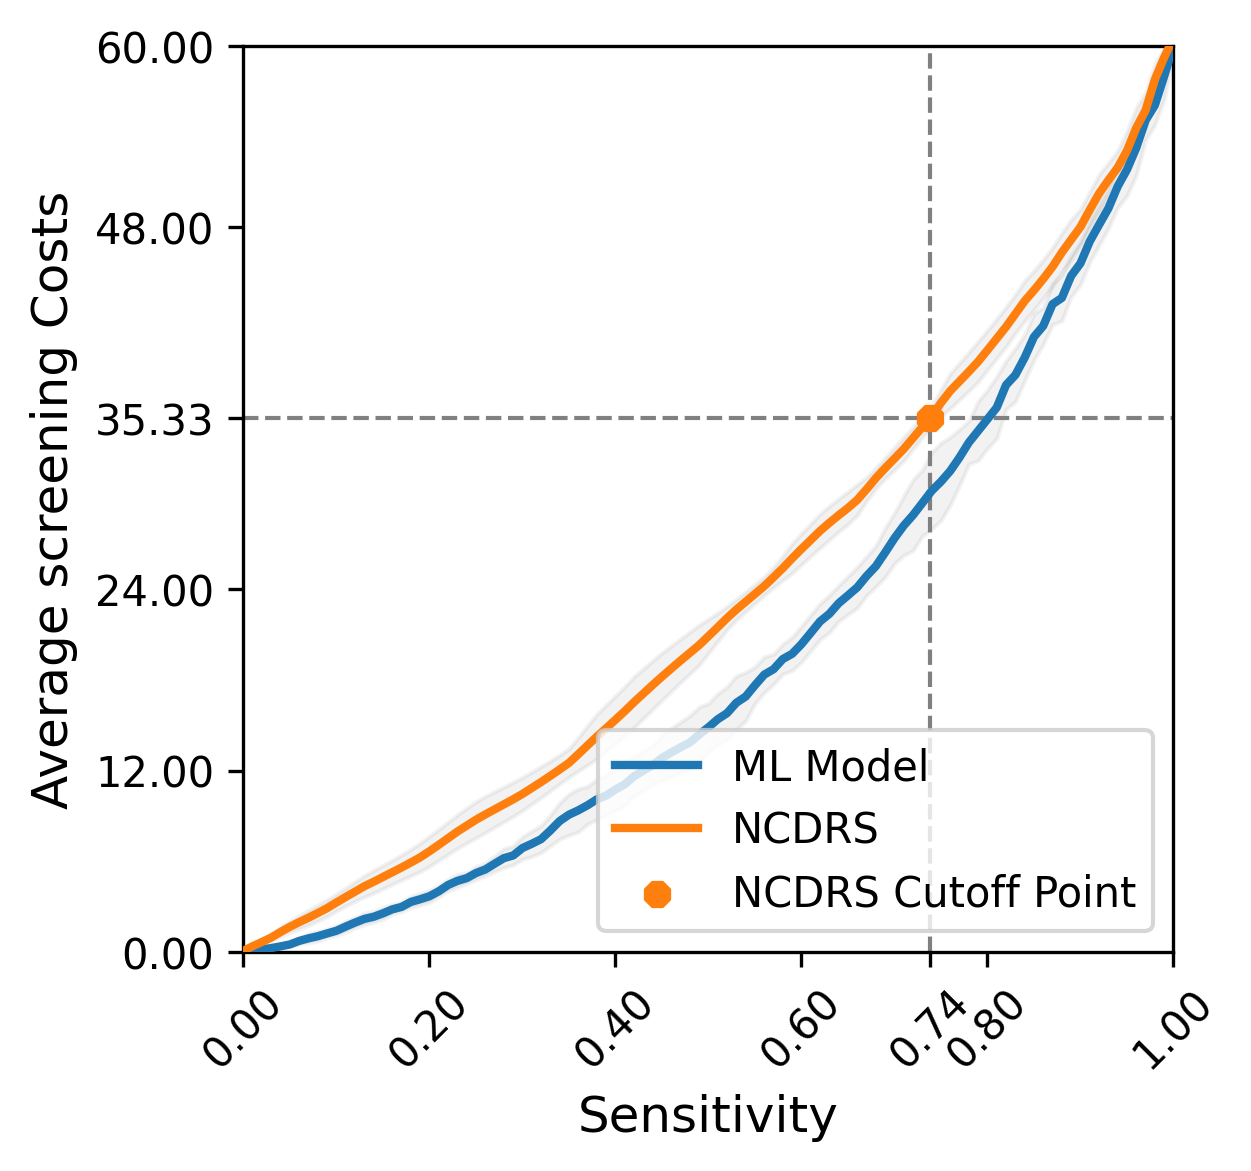

In [8]:
# Figure 4i

exp = CostMissRateExp(retrain=False)
exp.ylim = (0, 60)
exp.xlim = (0, 1)

exp.run("ML Model", "LightGBMModel", "top20_non_lab")
exp.run("NCDRS", "CHModel", "CH", cutoff=True)
# exp.run("ML+FPG Model", "LightGBMModel", "FPG")
# exp.run("NCDRS+FPG Model", "CHModel", "CH_FPG", cutoff=False)
# exp.run("ML+2hPG Model", "LightGBMModel", "2hPG")
# exp.run("NCDRS+2hPG Model", "CHModel", "CH_2hPG")
# exp.run("ML+HbA1c Model", "LightGBMModel", "HbA1c")
# exp.run("NCDRS+HbA1c Model", "CHModel", "CH_HbA1c")
exp.plot()
plt.legend(loc="lower right")
exp.save("figure4i")

0.03617210682492582
(0.03617210682492582, 60)
0.03617210682492582
(0.03617210682492582, 60)
NCDRS: miss_rate: 0.7382999044890162, costs: 35.33291394658754
0.03617210682492582
0.03617210682492582 0.03617210682492582 3.0
35.33291394658754
35.33291394658754 0.6670860534124614 3.0
0.7382999044890162
0.7382999044890162 0.06170009551098388 0.05
0.03617210682492582
0.03617210682492582 0.03617210682492582 3.0
35.33291394658754
35.33291394658754 0.6670860534124614 3.0
0.7382999044890162
0.7382999044890162 0.06170009551098388 0.05


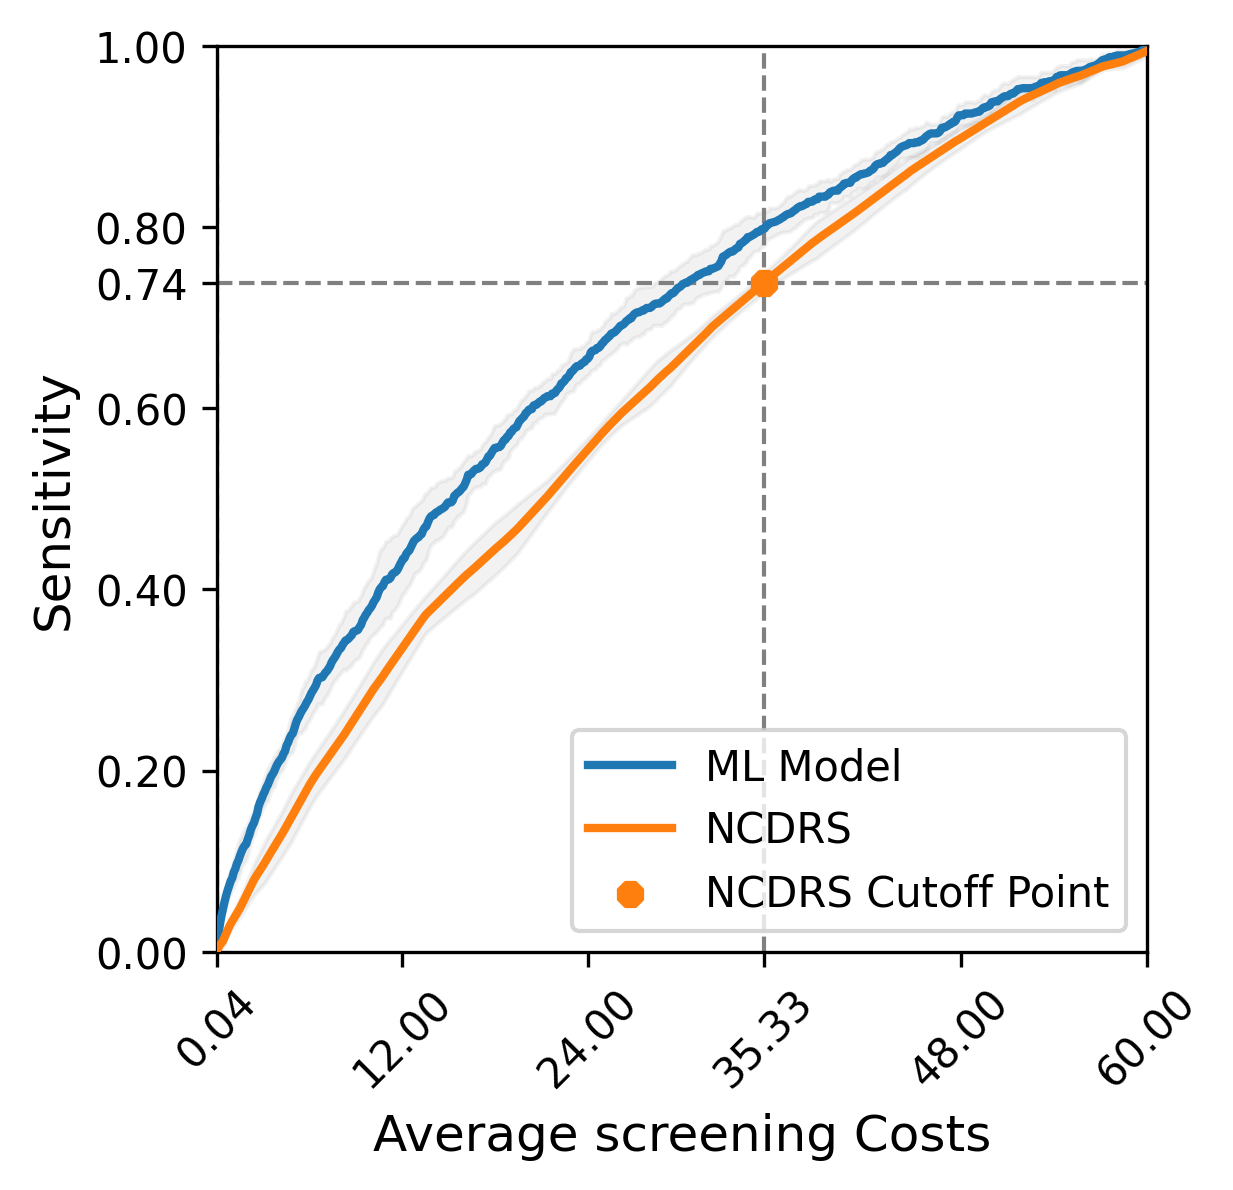

In [9]:
# Figure 4j

exp = SensitivityCostExp(retrain=False)
exp.xlim = (0, 60)
exp.ylim = (0, 1)

exp.run("ML Model", "LightGBMModel", "top20_non_lab")
exp.run("NCDRS", "CHModel", "CH", cutoff=True)
exp.plot()
plt.legend(loc="lower right")
exp.save("figure4j")

0.03617210682492582
(0.03617210682492582, 60)
0.03617210682492582
(0.03617210682492582, 60)
0.03617210682492582
0.03617210682492582 0.03617210682492582 3.0
0.03617210682492582
0.03617210682492582 0.03617210682492582 3.0


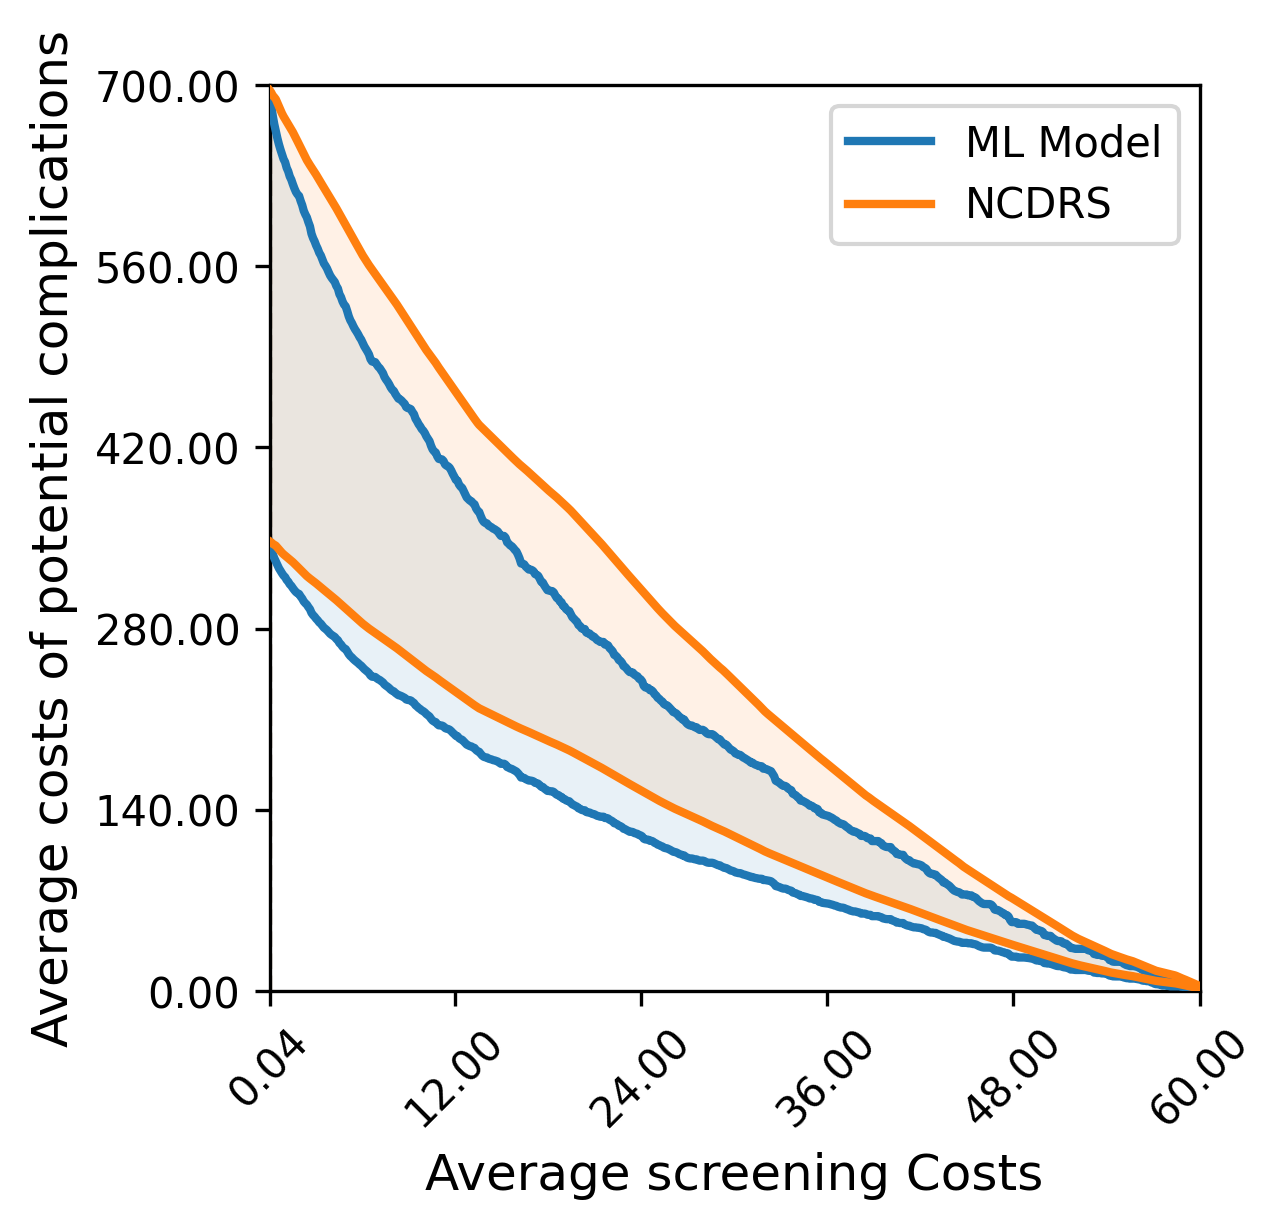

In [10]:
# Figure 4k

exp = FutureCostExp(compare_to_all=True, retrain=False)
exp.xlim = (0, 60)
exp.ylim = (0, 700)


# exp.MinCost = 45
exp.run("ML Model", "LightGBMModel", "top20_non_lab")
exp.run("NCDRS", "CHModel", "CH", cutoff=True)
# exp.run("ML+FPG Model", "LightGBMModel", "FPG")
# exp.run("NCDRS+FPG Model", "CHModel", "CH_FPG")
# exp.run("ML+2hPG Model", "LightGBMModel", "2hPG")
# exp.run("NCDRS+2hPG Model", "CHModel", "CH_2hPG")

exp.plot()
plt.legend(loc="upper right")
exp.save("figure4k")
